<a href="https://colab.research.google.com/github/mnassar/linkedin-queens-game/blob/main/GeneratingLinkedinQueensGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Linkedin Colored Queens Game boards

## @author: mohamad nassar

## Nov 2024

#### game website: https://www.linkedin.com/games/queens/

In [1]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
import random

# Define grid dimensions
width = 300  # Width of the image
height = 300  # Height of the image
num_rows = 9 # Number of rows in the grid
num_cols = 9  # Number of columns in the grid
  # Generate a list of distinct colors (equal to num_rows)
colors = [
    'lightsteelblue',
    'navajowhite',
    'plum',
    'salmon',
    'khaki',
    'darkgrey',
    'lightgreen',
    'gainsboro',
    'lightskyblue']


# random.shuffle(colors)



def draw_board(board, sq_color, sol=False):
  # Create a new image
  image = Image.new("RGB", (width, height), color=None)
  draw = ImageDraw.Draw(image)

  # Calculate cell dimensions
  cell_width = width // num_cols
  cell_height = height // num_rows

  # Generate grid with specified colors
  for row in range(num_rows):
      for col in range(num_cols):
          # Calculate cell coordinates
          x1 = col * cell_width
          y1 = row * cell_height
          x2 = x1 + cell_width
          y2 = y1 + cell_height
          # Draw the cell
          draw.rectangle([x1, y1, x2, y2], fill=sq_color[(row, col)], outline="black", width=1)

  if (sol):
    font_path = os.path.join(cv2.__path__[0],'qt','fonts','DejaVuSans.ttf')
    font = ImageFont.truetype(font_path, size=20)

    for r in range(num_rows):
      for c in range(num_cols):
        if board[r][c] == 'Q':
          draw.text((c * cell_width + cell_width/2, r * cell_height + cell_height/2), board[r][c], font=font, fill="black", anchor="mm")
  # Save the image
  # image.save("chessboard.png")

  # draw borders
  draw.rectangle([0, 0, cell_width * num_rows , cell_height * num_cols], outline="black", width=3)
  for row in range(num_rows):
      for col in range(num_cols-1):
          if sq_color[(row,col)] != sq_color[(row,col+1)]:
            draw.line([ ((col+1) * cell_width, row * cell_height), ((col+1) * cell_width, (row+1) * cell_height)], fill="black", width=3)
  for col in range(num_cols):
      for row in range(num_rows-1):
          if sq_color[(row,col)] != sq_color[(row+1,col)]:
            draw.line([ (col * cell_width, (row+1) * cell_height), ((col+1) * cell_width, (row+1) * cell_height)], fill="black", width=3)

  display(image)
  return image



def check_validity(queens):
  for q1 in queens:
    c1 = queens[q1]
    for q2 in queens:
      if q1 != q2:
        c2 = queens[q2]
        # are they adjacent? (i.e. norm inf. distance <= 1 )
        if c1 == c2 or max ( abs (q1 - q2), abs (c1 - c2)) == 1:
          return False
  return True

In [2]:
def generate_board():
  # place the queens
  board = [['x' for i in range(num_cols)] for j in range(num_rows)]

  queens = {}
  sq_color= {}

  # place queens randomly
  for i in range(num_rows):
    q = random.randint(0, num_cols-1)
    board[i][q] = 'Q'
    queens[i] = q

  # check validity
  while not check_validity(queens):
    # choose a queen
    q = random.randint(0, num_cols-1)
    board[q][queens[q]] = 'x'
    queens[q] = random.randint(0, num_rows-1)
    board[q][queens[q]] = 'Q'

  # decide on the color for each queen
  for q in queens:
    sq_color[(q,queens[q])] = colors[q]

  # decide on the color for each other square:
  # choose a square
  # decide on its color as one of the neighbor colors up, down, left, right if already colored
  # repeat till all squares are colored
  while len(sq_color) != num_rows * num_cols:
    r = random.choice (range(num_rows))
    c = random.choice (range(num_cols))
    if not (r,c) in sq_color:
      nei_r, nei_c = random.choice([(r+1,c), (r-1,c), (r,c+1), (r,c-1)])
      if nei_r < num_rows and nei_r >= 0 and nei_c < num_cols and nei_c >= 0 and (nei_r, nei_c) in sq_color:
        sq_color[(r,c)] = sq_color[(nei_r,nei_c)]
  return board, sq_color

  # print (sq_color)
  # for row in range(num_rows):
  #     for col in range(num_cols):
  #       print(board[row][col], end=' ')
  #     print()

  # Save the image
  # image.save("colored_grid.png")


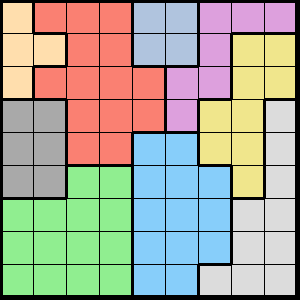

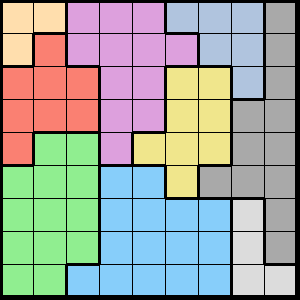

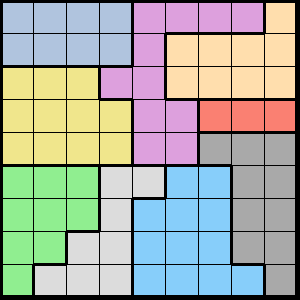

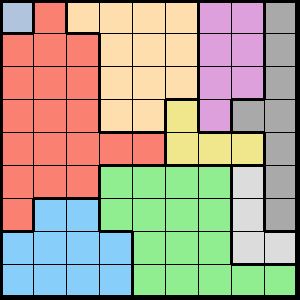

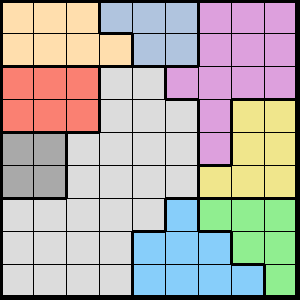

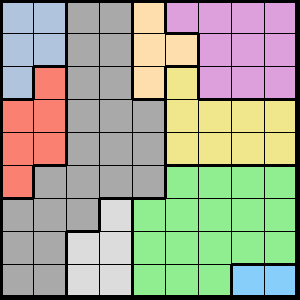

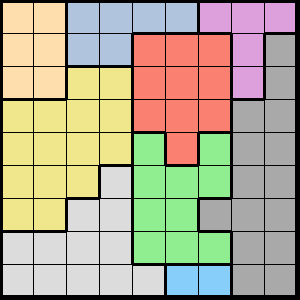

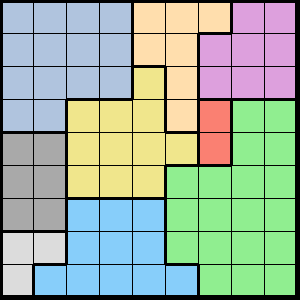

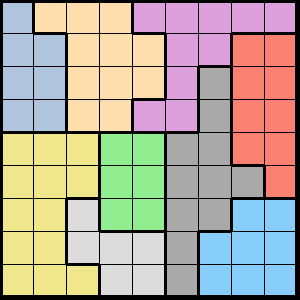

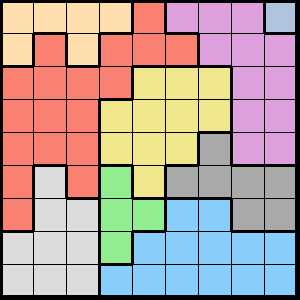

In [3]:
for i in range(10):
  board, sq_color = generate_board()
  image = draw_board(board, sq_color)
  image.save(f"colored_queens_{i:02}.png")
  # print(f"colored_queens_{i:02}.png")
